In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import random
from scipy.stats import levy_stable
import levy

In [ ]:
a = np.array(np.concatenate((range(-2500,-50), range(50,2500))))
prob = levy.levy(a, 1, 0, -2)

plt.plot(prob)
x = [random.choices(a, weights = prob) for x in range(5000)]
#print(x)

In [11]:
def levy_walk(N):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    mu = -2
    #depth_shift = list(range(1, 1000))
    #depth_probability = [i**mu for i in depth_shift]

    
    # event space: set of possible increments
    increments = levy_stable.rvs(alpha=1, beta=0, size=N) #change to power distribution
    p = 0.5
    # the epsilon values
    #random_increments = np.random.choice(increments, N, depth_probability)
    

    # calculate the random walk
    #cumsum adds to each step increment
    #random_walk = np.cumsum(random_increments)
    
    #######################PyLevy############################################
    a = np.array(np.concatenate((range(-2500,-50), range(50,2500))))
    print(a)
    prob = levy.levy(a, 1, 0, -2)
    x = [random.choices(a, weights = prob) for x in range(5000)]
    random_walk = np.cumsum(x)
    
    # return the entire walk and the increments
    #return random_walk, random_increments
    return random_walk, prob

# generate a random walk
N = 5000
R, epsilon = levy_walk(N)

# normalize the random walk using the Central Limit Theorem
R = R * np.sqrt(1./N)


fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, N), ylim=(np.min(R) - 0.5, np.max(R) + 0.5)) 
line, = ax.plot(R, lw=2, color='#0492C2')
ax.set_xticks(np.arange(0, N+1, 500))
#ax.set_yticks(np.arange(np.min(R) - 0.5, np.max(R) + 0.5, 0.2))
ax.set_title('2D Levy Walk', fontsize=22)
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

plt.show()



[-2500 -2499 -2498 ...  2497  2498  2499]


TypeError: expected bytes-like object, not str

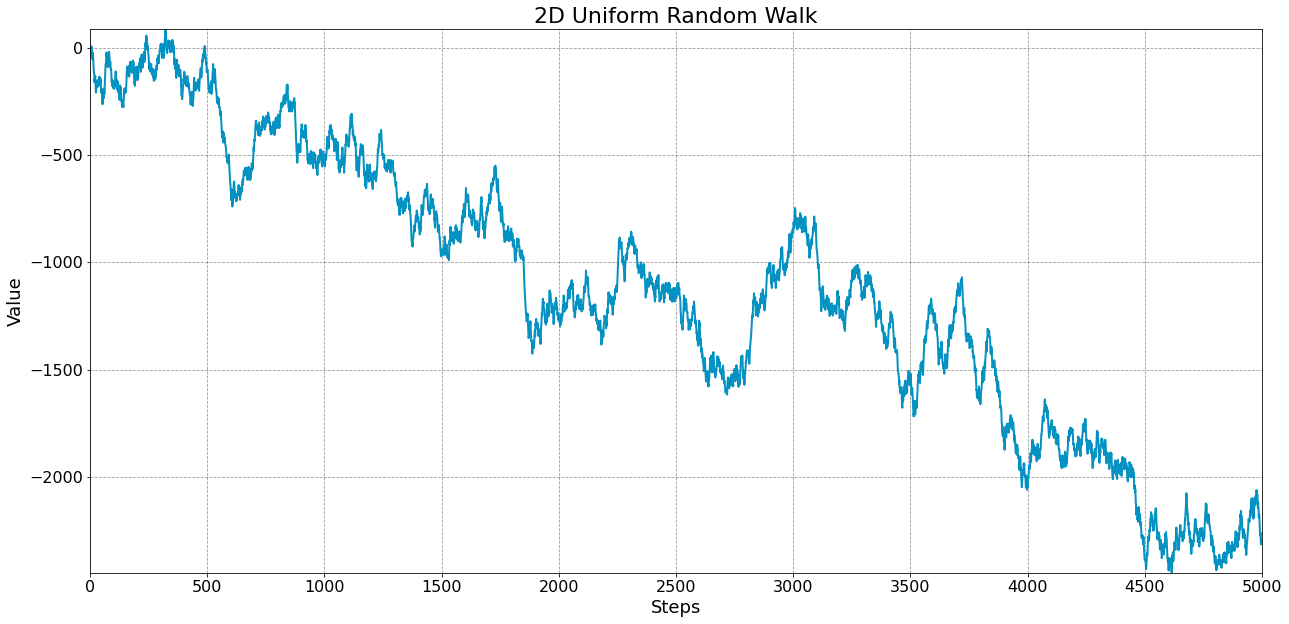

In [13]:
def random_walk(N):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    # event space: set of possible increments
    increments = np.array([1, -1])
    # the probability to generate 1
    p=0.5
    
    # the epsilon values
   
    # calculate the random walk
    #random_walk = np.cumsum(random_increments)
    prob = np.random.normal(loc=0.0, scale=1.0, size=N)
    #x= np.random.randint(-2500, high=2500, size=N)
    a = np.array(np.concatenate((range(-2500,-50), range(50,2500))))
    
    x = np.random.uniform(low=-2500, high=2500, size=5000)
    
    random_walk = np.cumsum(x)
    # return the entire walk and the increments
    return random_walk, prob

# generate a random walk
N = 5000
R1, epsilon = random_walk(N)

# normalize the random walk using the Central Limit Theorem
R1 = R1 * np.sqrt(1./N)


fig = plt.figure(figsize=(21, 10))

ax = plt.axes(xlim=(0, N), ylim=(np.min(R1) - 0.5, np.max(R1) + 0.5)) 
line, = ax.plot(R1, lw=2, color='#0492C2')
ax.set_title('2D Uniform Random Walk', fontsize=22)
ax.set_xticks(np.arange(0, N+1, 500))
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

plt.show()

NameError: name 'R' is not defined

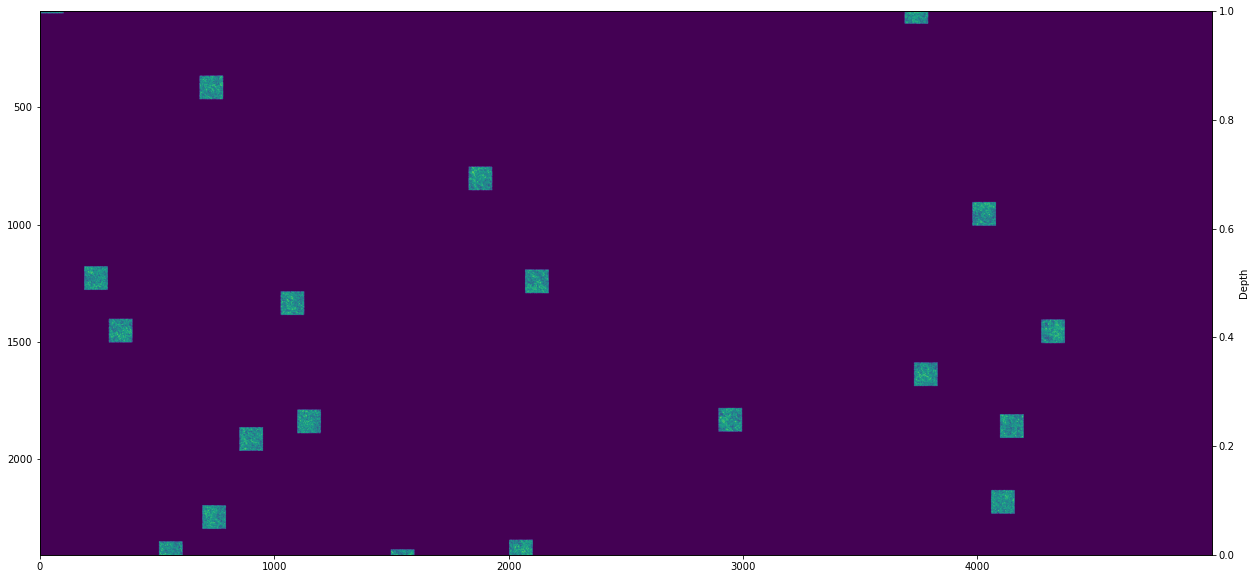

In [14]:
def generate_patch(patch_length):
    patch = np.zeros((patch_length,patch_length))
    maxstep = 5
    minstep = 1
    req_area = (patch_length**2)
    big_l = int(req_area**.5)
    pos=(50,50)
    hit = 0
    while(hit < req_area):
        l = big_l
        steps = levy_stable.rvs(alpha=1, beta=0, size=(big_l,2))
        for i in range(big_l):
            #print(steps[i])
            if abs(steps[i][0]) > maxstep:
                stepx = maxstep
            elif abs(steps[i][0]) < minstep:
                stepx = minstep
            else:
                stepx = steps[i][0]
            if abs(steps[i][1]) > maxstep:
                stepy = maxstep
            elif abs(steps[i][1]) < minstep:
                stepy = minstep
            else:
                stepy = steps[i][1]
            newposy = int(pos[0] + stepy)
            newposx = int(pos[1] + stepx)
            if(newposy >= 100):
                newposy = newposy - 100
            elif(newposy < 0):
                newposy = newposy + 100
            if(newposx >= 100):
                newposx = newposx - 100
            elif(newposx < 0):
                newposx = newposx + 100
            pos = (newposy, newposx)
            if(patch[pos[0]][pos[1]] == 0):
                patch[pos[0]][pos[1]] = l
                hit += 1
            l -= 1
    return patch

def create_seascape(patch_length, patch_count, seascape_length, seascape_width):
    if(seascape_length % patch_length != 0 or seascape_width % patch_length !=0):
        raise Exception("Seascape length and width must both be dividable by patch length")
    seascape = np.zeros((seascape_length, seascape_width))
    i = 0
    x = 0
    y = 0
#     minstep = 1
#     maxstep = 500
#     steps = levy_stable.rvs(alpha=1, beta=0, size=(patch_count,2))
    while(i < patch_count):
        patch = generate_patch(100)
        #print(patch.shape, x, y)
        y2 = 0
        for y1 in range(y, y + patch_length):
            x2 = 0
            for x1 in range(x, x+patch_length):
                if(x1 >= seascape_width):
                    x1 -= seascape_width
                if(y1 >= seascape_length):
                    y1 -= seascape_length
                seascape[y1][x1] = seascape[y1][x1] + patch[y2][x2]
                x2+=1
            y2+=1
        x = random.randint(0, seascape_width-100)
        y = random.randint(0, seascape_length-100)
        i += 1
#         if abs(steps[i][0]) > maxstep:
#             stepx = math.copysign(maxstep, steps[i][0])
#         elif abs(steps[i][0]) < minstep:
#             stepx = math.copysign(minstep, steps[i][0])
#         else:
#             stepx = steps[i][0]
#         if abs(steps[i][1]) > maxstep:
#             stepy = math.copysign(maxstep, steps[i][1])
#         elif abs(steps[i][1]) < minstep:
#             stepy = math.copysign(minstep, steps[i][1])
#         else:
#             stepy = steps[i][1]
#         newposy = int(y + stepy)
#         newposx = int(x + stepx)
#         if(newposy >= 4900):
#             newposy = newposy - 4900
#         elif(newposy < 0):
#             newposy = newposy + 4900
#         if(newposx >= 2400):
#             newposx = newposx - 2400
#         elif(newposx < 0):
#             newposx = newposx + 2400
#         y = newposy + patch.shape[1]
#         x = newposx + patch.shape[0]
        #print(seascape)
    return seascape



#plt.figure(figsize=(21, 10))
fig, ax1 = plt.subplots(figsize=(21, 10))
ax2 = ax1.twinx() 
plt.xlabel("Time Step")
plt.ylabel("Depth")
sea = create_seascape(100,20, 2500,5000)
ax1.imshow(sea)
ax2.plot(R, lw=2, color='#0492C2')
plt.show()



In [ ]:
#plt.figure(figsize=(21, 10))
fig, ax1 = plt.subplots(figsize=(21, 10))
ax2 = ax1.twinx() 
plt.xlabel("Time Step")
plt.ylabel("Depth")
ax1.imshow(sea)
ax2.plot(R1, lw=2, color='#0492C2')
plt.show()

In [30]:
def reward(sea, R):           #take inputs of seascape and record of verticle location
    reward = 0
    for i in range(len(R)):
        index = R[i]*-1
        if index < 0:         #make sure location is within bounds of seascape
            index = 0
        elif index > 2499:
            index = 2499
        else:
            index = int(index) #convert to integer
        
        reward += sea[index][i]
        
    return reward

rew = reward(sea, R1)
print("total krill encountered in path was: ", rew)

total krill encountered in path was:  10390.0
